# Ionic current driving term comparison

Two common models are used for the "driving term" of ionic currents.

## Linear (Ohmic)

The simplest model assumes a linear I-V relationship, proportional to the difference between the membrane potential and the ion's reversal potential:

$$ I_x^{Ohm} = g_x (V - V_x) $$

where $I_x$ is current (nA), $g_x$ is conductance ($\mu$S), $V$ is the membrane potential (mV), and $V_x$ is the Nernst potential (mV).
Recognising this equation as $V = I R$ in disguise we call this an _Ohmic_ current model.

The Nernst potential can be derived from considering the electrochemical potential on either side of a semi-permeable membrane (see Keener & Sneyd, 2.6.1, page 80), and is a more universal result than the linear approximation above.
It is given by

$$ V_x = \frac{RT}{z_xF} \log \frac{[X]_e}{[X]_i}.$$

Here $[X]_e$ and $[X]_i$ are the external and internal ionic concentrations (in mM=mmol/L), $z_x$ is the valence of the ion, $R$ is the gas constant, F is the Faraday constant, and T is temperature.
We use
\begin{align}
R &= 8314 \; \text{mJ} / \text{K} / \text{mol} \\
T &= 273 + 37 = 310 \; \quad \text{K} \\
F &= 96485 \; \text{C} / \text{mol}
\end{align}
so that
$$ \frac{RT}{F} \approx 26.7 \text{mV} $$
and we can use $V$ in mV.

## Goldman-Hogdkin-Katz (GHK)

This model can be derived from the "Nernst-Planck equation", by assuming a *constant voltage gradient* along the pore (see Keener & Sneyd, section 2.6.3, page 83):

$$ I_x^{GHK} = P_x \frac{z_x^2F^2}{RT}V \frac{[X]_i - [X]_e \exp(-V \frac{z_x F}{RT})}{1 - \exp(-V \frac{z_x F}{RT})} $$

where $P_x$ is a *permeability* (in $\text{s}/\mu\text{L}$ to get $I$ in nA).

Like the linear approximation, GKH currents are zero when $V = V_x$.
They are _not_ necessarily zero when $V$ is zero, which can be seen by using [L'Hôpital's rule](https://en.wikipedia.org/wiki/L%27H%C3%B4pital%27s_rule) to find the limit of $I_x$ when $V$ approaches zero.

**Note: this is the "[GHK flux equation](https://en.wikipedia.org/wiki/Goldman%E2%80%93Hodgkin%E2%80%93Katz_flux_equation)" for a single ion species, not the [Goldman or GHK voltage equation](https://en.wikipedia.org/wiki/Goldman_equation) for a multi-ion reversal potential.**

The constant voltage gradient assumption is not a very bad one.
For example, molecular dynamics simulations shown in [Roux et al.](https://doi.org/10.1017/S0033583504003968) display a near-linear gradient for very simple channels (but a more complicated shape for more complex channels).

## How do $g$ and $P$ relate to each other?

To see the relationship between permeability and conductance constants, we can linearise the GHK equation around $V = V_r$, where both models predict the same value.

Using a [first order approximation](https://en.wikipedia.org/wiki/Linearization) we find:

$$ L(V) = I_x(V_x) + I_x'(V_x) (V - V_x) $$

where

$$ I_x'(V_x) = \frac{dI_x}{dV} \bigg\rvert_{V = V_x} $$

Since $I_x(V_x) = 0$, we find $L(V) = I_x'(V_x) (V - V_x)$, so that $g_x = I_x'(V_x)$.

Before writing out the derivative $I_x'(V_x)$ we define some shorthand notation:
\begin{align}
x_i &= [X]_i \\
x_e &= [X]_e \\
\alpha &= \frac{RT}{z_xF} \\
\beta(V) &= \exp\left(-V \frac{z_x F}{RT}\right) = \exp(-V/\alpha)
\end{align}

So that

$$ I_x'(V) = \frac{d}{dV} I_x^{GHK}(V) = P_x \frac{z_x F}{\alpha} \frac{d}{dV} \left( V \frac{x_i - x_e \beta}{1 - \beta} \right) $$

to solve this we'll need $ \frac{d}{dV} (x_i - x_e \beta) = \beta\frac{x_e}{\alpha} $ and $ \frac{d}{dV} (1 - \beta) = \beta\frac{1}{\alpha} $

so that

$$ I_x'(V) = P_x \frac{z_x F}{\alpha} \left( 
    \frac{x_i - x_e \beta}{1 - \beta}
    + V \frac{
        \beta\frac{x_e}{\alpha}(1 - \beta) 
        - \beta\frac{1}{\alpha}(x_i - x_e \beta)}
        {(1 - \beta)^2}
    \right) $$

we then evaluate at $V_x$ to find

$$ \beta(V_x) = \exp(-V_x / \alpha) = \exp(-\log(x_e / x_i)) = \frac{x_i}{x_e}$$

and

\begin{align}
I_x'(V_x) 
&= P_x \frac{z_x F}{\alpha} \left( 
    \frac{x_i - x_e \frac{x_i}{x_e}}{1 - \frac{x_i}{x_e}}
    + V_x \frac{
        \frac{x_i}{x_e}\frac{x_e}{\alpha}(1 - \frac{x_i}{x_e}) 
        - \frac{x_i}{x_e}\frac{1}{\alpha}(x_i - x_e \frac{x_i}{x_e})}
    {(1 - \frac{x_i}{x_e})^2}
    \right) \\
&= P_x \frac{z_x F}{\alpha}
    V_x \frac{\frac{x_i}{\alpha}(1 - \frac{x_i}{x_e})}{(1 - \frac{x_i}{x_e})^2} \\
&= P_x \frac{z_x F}{\alpha^2}
    \cdot \frac{x_i}{1 - \frac{x_i}{x_e}}
    \cdot V_x \\
&= P_x \frac{z_x F}{\alpha^2} \cdot \frac{x_i x_e}{x_e - x_i} \cdot V_x \\
&= P_x \frac{z_x F}{\alpha} \cdot \frac{x_i x_e}{x_e - x_i} \cdot \log\frac{x_e}{x_i} \\
\end{align}

Or

$$ g_x = P_x \frac{z_x^2 F^2}{RT} \left(\frac{[X]_e [X]_i}{[X]_e - [X]_i}\right) \log\frac{[X]_e}{[X]_i} $$

and

$$ P_x = g_x \frac{RT}{z_x^2 F^2} \frac{[X]_e - [X]_i}{[X]_e [X]_i \log\left([X]_e/[X]_i\right)} $$

## Can we get some numbers?

The following table summarises internal values given in _Alberts et al. (2008) Molecular Biology of the Cell, 5th edition, page 652;_ and _Guyton & Hall (2011) Textbook of Medical Physiology, 12th edition, page 7_.

| Ion       | Internal | External |
|-----------|----------|----------|
| Sodium    | 5-15 mM  | 142 mM   |
| Potassium | 140 mM   | 4.2 mM   |
| Calcium   | 0.1 uM   | 1.2 mM   |
| Chloride  | 5-15 mM  | 108 mM   |

(Note that cardiac models like slightly different values, e.g. $[\text{K}^+]_o = 5.4$ mM and $[\text{Ca}^{2+}]_o = 2$ mM).

Looking at the equation for $g_x$, it seems like $[X]_e / [X]_i$ will have a strong influence.
We can reparametrise using $\epsilon = [X]_e / [X]_i$ to find:

\begin{align}
g_x &= P_x \frac{z_x^2 F^2}{RT} \frac{\log \epsilon}{\epsilon - 1} [X]_e
\end{align}

We can revisit the data above, doing a bit of guessing and rounding, to find

| Ion       | Internal | External | Epsilon | Log eps | Term     | Vx    |
|-----------|----------|----------|---------|---------|----------|-------|
| Sodium    | 10 mM    | 140 mM   | 14      |  2.639  | 12.3     |  70.5 |
| Potassium | 140 mM   | 4.2 mM   | 0.03    | -3.507  |  6.59    | -93.7 |
| Calcium   | 0.1 uM   | 1.2 mM   | 12000   |  9.39   |  0.00163 |  125  |
| Chloride  | 10 mM    | 110 mM   | 11      |  2.398  | 11.5     | -64.1 |

where "Term" is $z_x^2 \frac{\log \epsilon}{\epsilon - 1} [X]_e$.

So, assuming the permeabilities are more or less the same, we might expect a very "flat" calcium current near $V_x$.

## When is the linearisation a good approximation?

To find this out, we _could_ try working out the next term in the Taylor series the linearization is based on, but that involves a lot of differentiating...

Another approach is to write down an equation for $ I_x^\text{Ohm} / I_x^\text{GHK} $:

\begin{align}
\frac{I_x^\text{Ohm}}{I_x^\text{GHK}}
&= \frac{P_x \frac{z_xF}{\alpha}}{P_x \frac{z_xF}{\alpha}}
   \frac{
    x_e \frac{\log \epsilon}{\epsilon - 1} (V - \alpha \log{\epsilon})
   }{
    V \frac{x_i - x_e \exp(-V/\alpha)}{1 - \exp(-V/\alpha)}
   }
\\ \\
&= \frac{\log \epsilon}{\epsilon - 1} \cdot 
   \frac{V - \alpha \log{\epsilon}}{V} \cdot
   x_e \cdot
   \frac{1 - \exp(-V/\alpha)}{x_i - x_e \exp(-V/\alpha)}
\\ \\
&= \frac{\log \epsilon}{\epsilon - 1} \cdot 
   (1 - V_x / V) \cdot
   \frac{1 - \exp(-V/\alpha)}{1/\epsilon - \exp(-V/\alpha)}
\end{align}

Ugly as this is, it seems to be independent of the absolute values of the concentrations. 
It does still depend on the valence, through $\alpha$.

We can turn this into a nicer "error function" by taking e.g.

\begin{align}
\left| \frac{I_x^\text{Ohm} - I_x^\text{GHK}}{I_x^\text{GHK}} \right|
&= \left| \frac{I_x^\text{Ohm}}{I_x^\text{GHK}} - 1 \right|
\end{align}

which should be 0 when they match, larger otherwise.

We can now try plotting this expression for the different ions mentioned above.

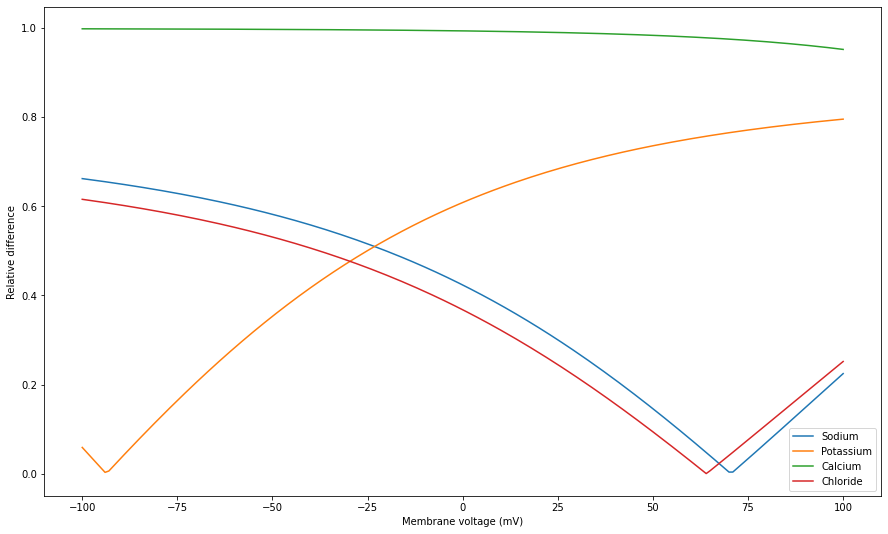

In [1]:
import matplotlib.pyplot as plt
import numpy as np

R = 8314        # mJ / K / mol
T = 273 + 37    # K
F = 96485       # C / mol

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Membrane voltage (mV)')
ax.set_ylabel('Relative difference')

v = np.linspace(-100, 100, 201) + 1e-9

def f(v, xi, xe, z=1):
    e = xe / xi
    a = R * T / (z * F)
    p = np.log(e) / (e - 1)
    q = (v - a * np.log(e)) / v
    r = (1 - np.exp(-v / a)) / (1/e - np.exp(-v / a))
    return p * q * r

nai = 10
nae = 140
ax.plot(v, np.abs(1 - f(v, nai, nae)), label='Sodium')

ki = 140
ke = 4.2
ax.plot(v, np.abs(1 - f(v, ki, ke)), label='Potassium')

cai = 1e-4
cae = 1.2
ax.plot(v, np.abs(1 - f(v, cai, cae)), label='Calcium')

cli = 10
cle = 110
ax.plot(v, np.abs(1 - f(v, cli, cle)), label='Chloride')

plt.legend()
plt.show()

## Graphical comparison

We can now plot a few graphs comparing the GHK equation to an Ohmic model.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

R = 8314        # mJ / K / mol
T = 273 + 37    # K
F = 96485       # C / mol

def peq(Xi, Xe, g=1, z=1):
    """ Return equivalent P for a given g. """
    return g * R * T * (Xe - Xi) / (z * z * F * F * Xi * Xe * np.log(Xe / Xi))

def ghk(V, Xi, Xe, g=1, z=1):
    zv = V * z * F / (R * T)
    ev = np.exp(-zv)
    return peq(Xi, Xe, g, z) * zv * z * F * (Xi - Xe * ev) / (1 - ev)

def nernst(Xi, Xe, z=1):
    return R * T / (z * F) * np.log(Xe / Xi)

def ohm(V, Xi, Xe, g=1, z=1):
    return g * (V - nernst(Xi, Xe, z))

### Sodium

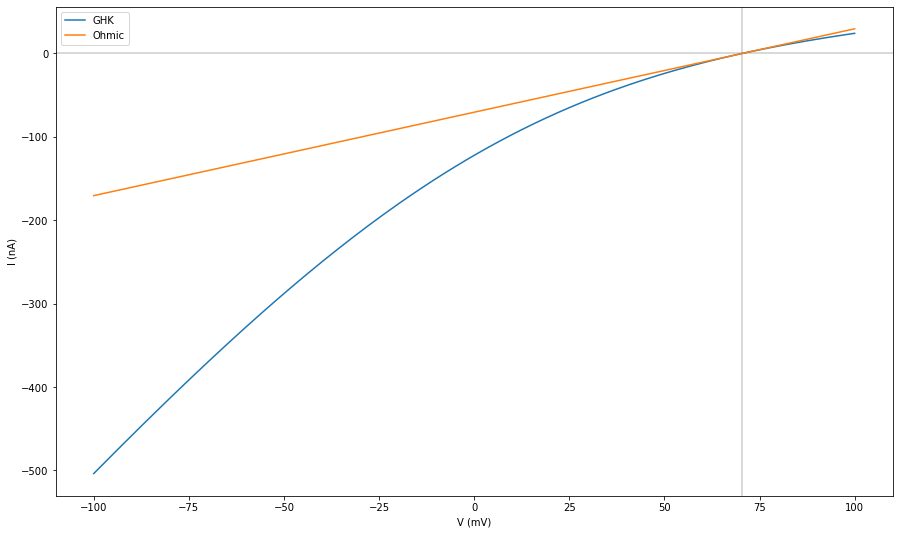

In [3]:
vna = np.linspace(-100, 100, 201) + 1e-9

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('V (mV)')
ax.set_ylabel('I (nA)')
ax.axhline(0, color='k', alpha=0.2)
ax.axvline(nernst(nai, nae), color='k', alpha=0.2)
ax.plot(vna, ghk(vna, nai, nae), label='GHK')
ax.plot(vna, ohm(vna, nai, nae), label='Ohmic')
plt.legend()
plt.show()

In [4]:
nernst(nai, nae)

70.49539325191056

### Potassium

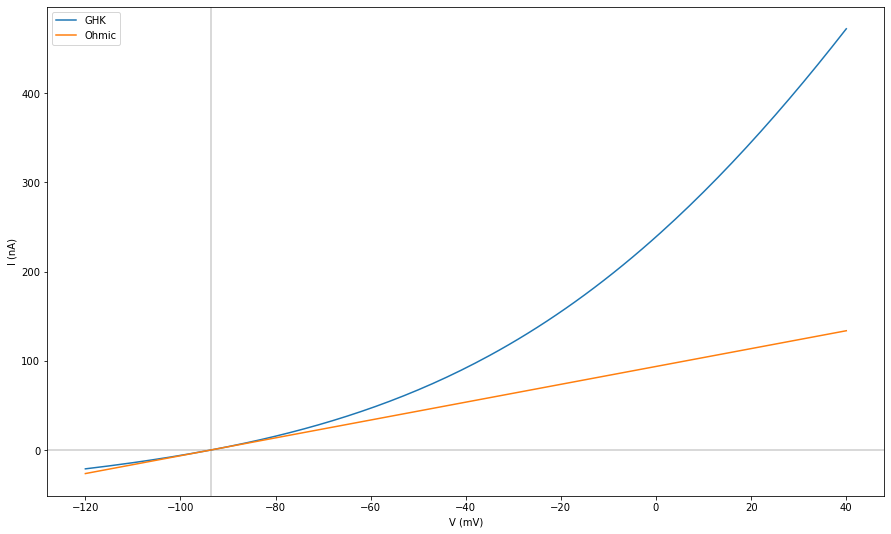

In [5]:
vk = np.linspace(-120, 40, 161) + 1e-9

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('V (mV)')
ax.set_ylabel('I (nA)')
ax.axhline(0, color='k', alpha=0.2)
ax.axvline(nernst(ki, ke), color='k', alpha=0.2)
ax.plot(vk, ghk(vk, ki, ke), label='GHK')
ax.plot(vk, ohm(vk, ki, ke), label='Ohmic')
plt.legend()
plt.show()

In [6]:
nernst(ki, ke)

-93.66836224365116

### Calcium

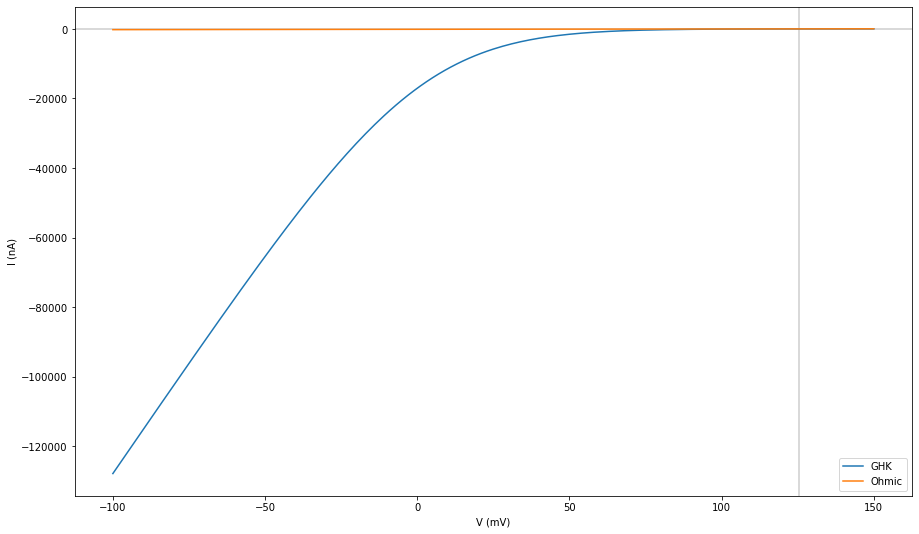

In [7]:
vca = np.linspace(-100, 150, 251) + 1e-9

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('V (mV)')
ax.set_ylabel('I (nA)')
ax.axhline(color='k', alpha=0.2)
ax.axvline(nernst(cai, cae, z=2), color='k', alpha=0.2)
ax.plot(vca, ghk(vca, cai, cae, z=2), label='GHK')
ax.plot(vca, ohm(vca, cai, cae, z=2), label='Ohmic')
plt.legend()
plt.show()

In [8]:
nernst(cai, cae, z=2)

125.44998339377325

### Chloride

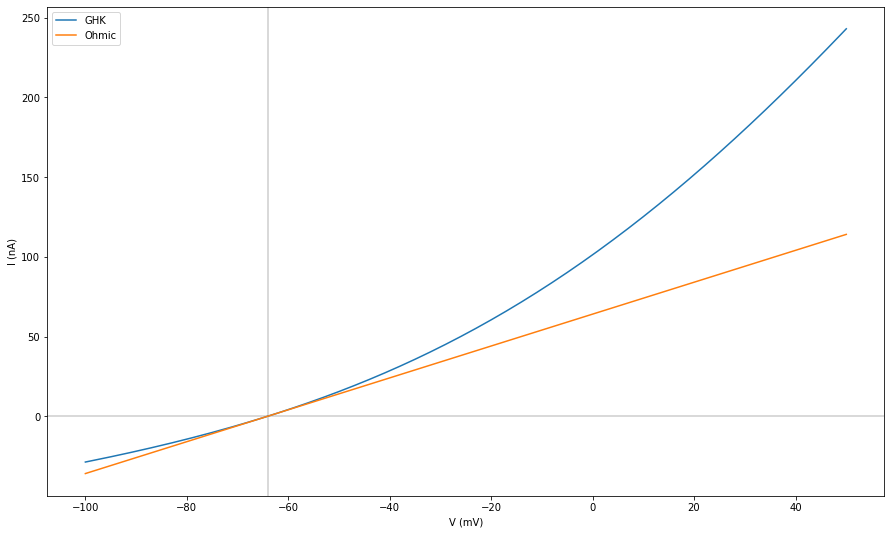

In [9]:
vcl = np.linspace(-100, 50, 151) + 1e-9

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('V (mV)')
ax.set_ylabel('I (nA)')
ax.axhline(color='k', alpha=0.2)
ax.axvline(nernst(cli, cle, z=-1), color='k', alpha=0.2)
ax.plot(vcl, ghk(vcl, cli, cle, z=-1), label='GHK')
ax.plot(vcl, ohm(vcl, cli, cle, z=-1), label='Ohmic')
plt.legend()
plt.show()

In [10]:
nernst(cli, cle, z=-1)

-64.05339070730324

## Poisson-Nernst-Planck equations

Summarising the above:

- The GHK current model can be derived from the Nernst-Planck equation, assuming a constant voltage gradient along the pore
- The Ohmic current model can be viewed as a linear approximation of the GHK model. If we construct this so that at the Nernst potential it has zero current _and matches the gradient of the GHK equation_, it's quite a poor approximation, with an error that increases with the ratio of external to internal concentration.

An alternative view can be obtained by starting from the slightly more general "Poisson-Nernst-Planck equations" (see Keener & Sneyd, 3.3.1, page 129).
As shown in Keener & Sneyd, this can be non-dimensionalised to contain a length parameter:

\begin{align}
\lambda^2 = \frac{qF N_a}{\epsilon RT} L^2 (c_i + c_e)
\end{align}

where $\epsilon$ is the dielectric constant of the channel medium, $L$ is the channel length, and $c_i$ and $c_e$ are concentrations inside and outside the cell.

The PNP equations can then be solved by taking the limit $\lambda \rightarrow 0$ to find the GHK equation, or $\lambda \rightarrow \infty$ to find the linear model.
This suggests that _short channels_ or _low concentrations_ require a GHK approach, while long channels or higher concentrations would be fit with a linear model.

However, we can be a bit more precise by sticking numbers in the equation:

In [11]:
T = 273 + 37     # Temperature (K)
RR = 8.314       # Gas constant (J/K/mol)
F = 96485        # Faraday constant (C/mol)
Na = 6.022e23    # Avogadro constant (1/mol)
q = 1.602e-19    # Elementary charge (C)

Where we use $R$ in J instead of mJ.
[Malmberg and Marryott (1956)](https://nvlpubs.nist.gov/nistpubs/jres/56/jresv56n1p1_a1b.pdf) give the dielectric constant of water at 35 degrees is 74.8, which might be appropriate.

For the channel length, we can start from the thickness of the membrane, which is about 4nm.

In [12]:
d = 4e-9    # Membrane tickness, approx 4nm
e = 74.8    # Dielectric constant of water at 35 degrees

a = d**2 * q * F * Na / (RR * T * e)

print(a)
print(np.sqrt(a))

7.725200054659846e-13
8.789311722006363e-07


So that

$$ \lambda \approx 8.8 \cdot 10^{-7} \sqrt{c_i + c_e} $$

where $c$ is in $\text{mol}/\text{m}^3 = 10^{-3} \text{mol}/\text{L} = \text{mM}$.

It seems then, that even for concentrations around $O(100) \text{mM}$ we have $\lambda << 1$, or at least $\lambda < 1$, so that the "low concentrations" criterium is met for all four ion species?

## Long-channel limit

Assuming the long-channel limit, on page 133 Keener & Sneyd derive a flux

$$ J = \frac{D}{L}\frac{zF}{RT}\frac{c_e - c_i}{\log\frac{c_e}{c_i}}\left(V - \frac{RT}{zF}\log\frac{c_e}{c_i}\right) $$

which we can convert to a current (see page 85)

$$ I_x^* = P_x \frac{z_x^2F^2}{RT}\frac{[X]_e - [X]_i}{\log([X]_e/[X]_i)}(V - V_x) $$

(using $P=D/L$ and multiplying by $zF$).

Which we can compare to the linearisation:

$$ I_x = P_x \frac{z_x^2 F^2}{RT} \left(\frac{[X]_e [X]_i}{[X]_e - [X]_i}\right) \log\frac{[X]_e}{[X]_i} (V - V_x)$$

so that

\begin{align}
g_x^* = g_x \frac{
    ([X]_e - [X]_i)^2
}{
    [X]_e [X]_i (\log\frac{[X]_e}{[X]_i})^2
}
\end{align}

We can do some plots to compare both methods

In [13]:
def ohm2(V, Xi, Xe, g=1, z=1):
    g *= (Xe - Xi)**2 / (Xe * Xi * np.log(Xe/Xi)**2)    
    return g * (V - nernst(Xi, Xe, z))

### Sodium

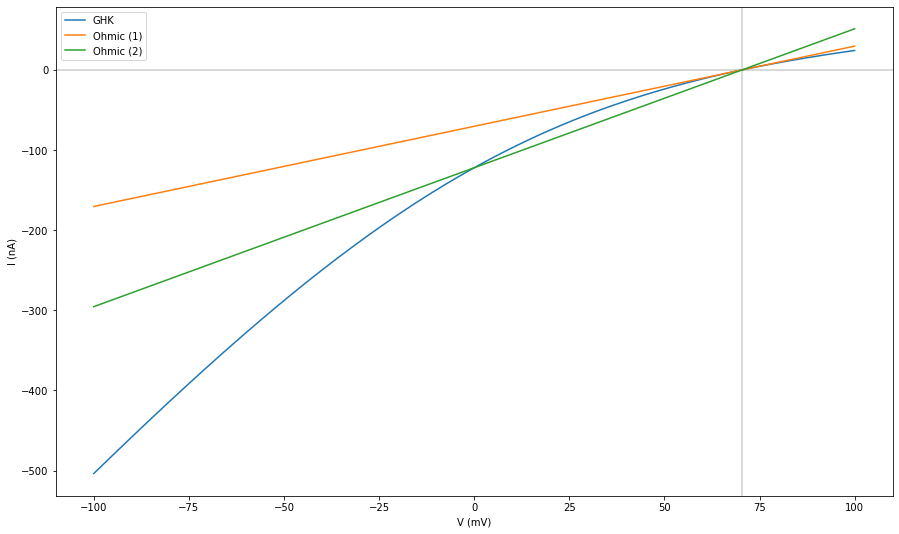

In [15]:
vna = np.linspace(-100, 100, 201) + 1e-9

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('V (mV)')
ax.set_ylabel('I (nA)')
ax.axhline(0, color='k', alpha=0.2)
ax.axvline(nernst(nai, nae), color='k', alpha=0.2)
ax.plot(vna, ghk(vna, nai, nae), label='GHK')
ax.plot(vna, ohm(vna, nai, nae), label='Ohmic (1)')
ax.plot(vna, ohm2(vna, nai, nae), label='Ohmic (2)')
plt.legend()
plt.show()

### Potassium

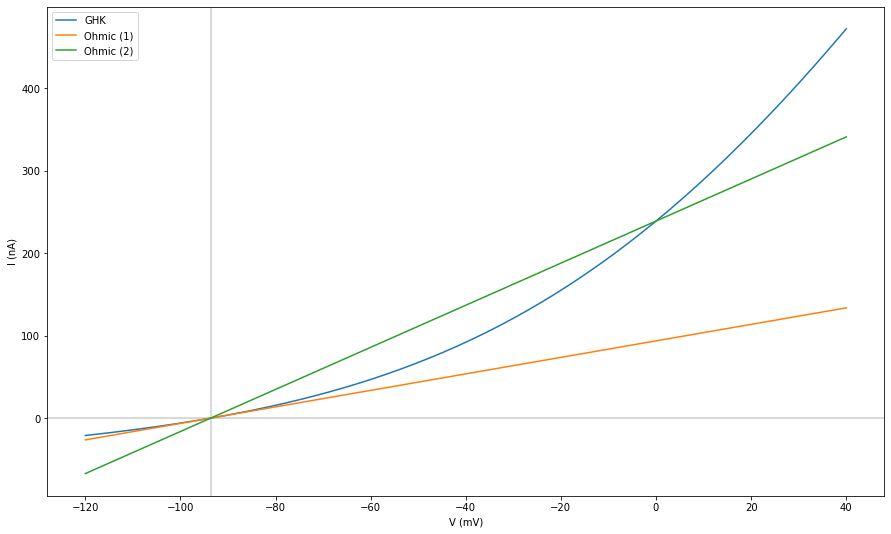

In [16]:
vk = np.linspace(-120, 40, 161) + 1e-9

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('V (mV)')
ax.set_ylabel('I (nA)')
ax.axhline(0, color='k', alpha=0.2)
ax.axvline(nernst(ki, ke), color='k', alpha=0.2)
ax.plot(vk, ghk(vk, ki, ke), label='GHK')
ax.plot(vk, ohm(vk, ki, ke), label='Ohmic (1)')
ax.plot(vk, ohm2(vk, ki, ke), label='Ohmic (2)')
plt.legend()
plt.show()


### Calcium

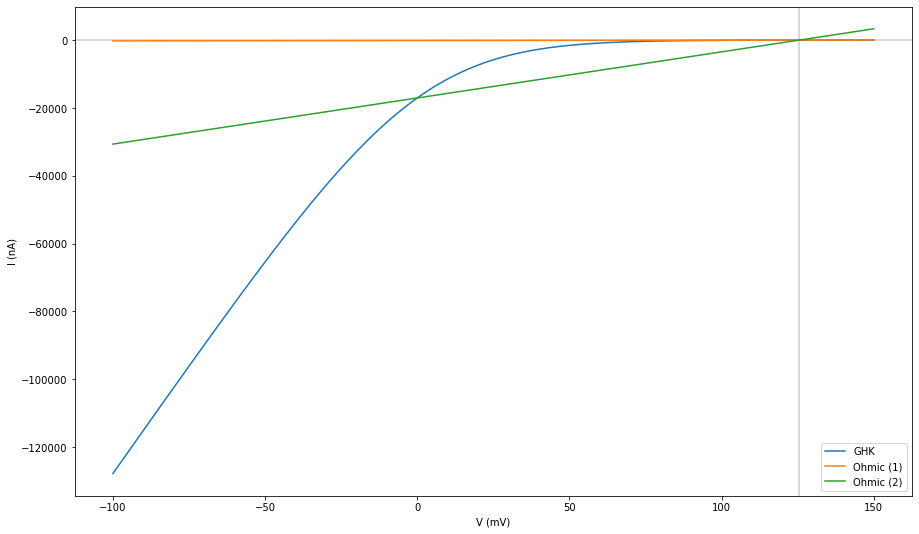

In [20]:
vca = np.linspace(-100, 150, 251) + 1e-9

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('V (mV)')
ax.set_ylabel('I (nA)')
ax.axhline(color='k', alpha=0.2)
ax.axvline(nernst(cai, cae, z=2), color='k', alpha=0.2)
ax.plot(vca, ghk(vca, cai, cae, z=2), label='GHK')
ax.plot(vca, ohm(vca, cai, cae, z=2), label='Ohmic (1)')
ax.plot(vca, ohm2(vca, cai, cae, z=2), label='Ohmic (2)')
plt.legend()
plt.show()

### Chloride

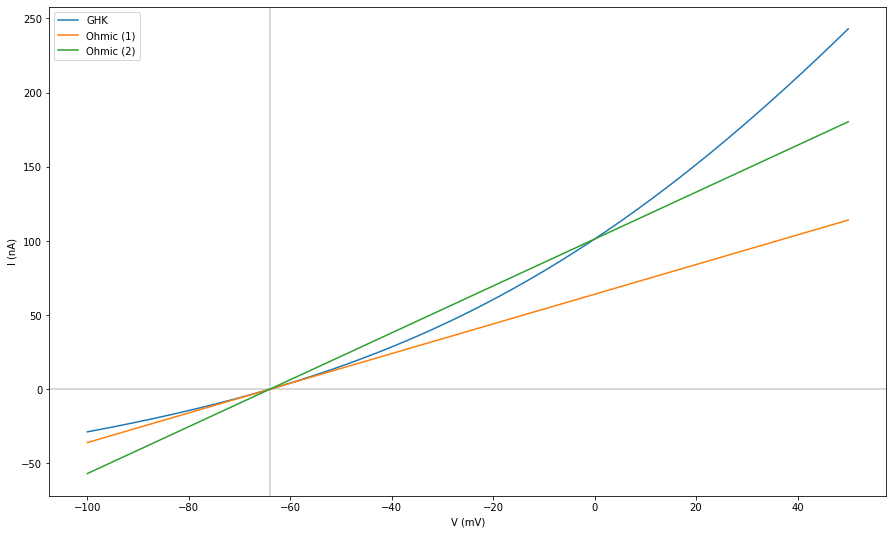

In [21]:
vcl = np.linspace(-100, 50, 151) + 1e-9

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('V (mV)')
ax.set_ylabel('I (nA)')
ax.axhline(color='k', alpha=0.2)
ax.axvline(nernst(cli, cle, z=-1), color='k', alpha=0.2)
ax.plot(vcl, ghk(vcl, cli, cle, z=-1), label='GHK')
ax.plot(vcl, ohm(vcl, cli, cle, z=-1), label='Ohmic (1)')
ax.plot(vcl, ohm2(vcl, cli, cle, z=-1), label='Ohmic (2)')
plt.legend()
plt.show()

Instead of matching the GHK gradient at the reversal potential, these curves match its value at the reversal potential and at zero, leading to slightly more useful values.